# <center> Retail Case Study

In [50]:
import pandas as pd
import pandas_profiling as pp
import datetime as dt
import re
import matplotlib.pyplot as plt
import numpy as np

### <b>1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.Ensure tokeep all customers who have done transactions with us and select the join type accordingly

In [3]:
cust=pd.read_csv(r'C:\Users\Akash\Desktop\python\case study 3\Customer.csv')
prod=pd.read_csv(r'C:\Users\Akash\Desktop\python\case study 3\prod_cat_info.csv')
tran=pd.read_csv(r'C:\Users\Akash\Desktop\python\case study 3\Transactions.csv')

In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [5]:
cust['DOB']=pd.to_datetime(cust.DOB,format='%d-%m-%Y')

In [6]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [7]:
tran['tran_date']=pd.to_datetime(tran.tran_date)

C:\Users\Akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Akash\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-02-2014' in DD/MM/YYYY format. Provide format or specif

In [8]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 1.8+ MB


In [9]:
cust_fi = pd.merge(left=tran,right=cust,left_on=['cust_id'],right_on=['customer_Id'],how='left')

In [10]:
cust_fi

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0


In [11]:
cust_final = pd.merge(left=cust_fi,right=prod,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],how='left')

In [12]:
cust_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,1,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,1973-05-11,F,8.0,Electronics,5,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,1981-06-08,M,3.0,Home and kitchen,11,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,1992-07-27,M,8.0,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,274550,1972-02-21,M,7.0,Books,12,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,270022,1984-04-27,M,9.0,Clothing,4,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,271020,1976-06-20,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,270911,1970-05-22,M,2.0,Books,11,Children


In [13]:
cust_final=cust_final.drop(columns=['customer_Id','prod_sub_cat_code'],axis=1)

In [14]:
cust_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children


# 2. Prepare a summary report for the merged data set.

## a.Get the column names and their corresponding data types.

In [15]:
cust_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
prod_cat                    object
prod_subcat                 object
dtype: object

## b.Top/Bottom 10 observations.

In [16]:
cust_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-10-09,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-11-04,F,8.0,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances


In [17]:
cust_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,1976-08-10,M,8.0,Books,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,1991-10-12,M,4.0,Electronics,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,1980-01-17,F,8.0,Books,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,1975-06-28,F,6.0,Home and kitchen,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,1974-04-18,M,4.0,Footwear,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,Children


## c.“Five-number summary” for continuous variables (min, Q1, median, Q3 and max).

In [18]:
cust_final.describe().iloc[3:]

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
min,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
25%,2.493864e+10,268935.0,3.0,2.0,1.0,312.0,98.280,762.450,3.0
50%,5.009313e+10,270980.0,5.0,4.0,3.0,710.0,199.080,1754.740,5.0
75%,7.533000e+10,273114.0,10.0,5.0,4.0,1109.0,365.715,3569.150,8.0
max,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,10.0


## d.Frequency tables for all the categorical variables

In [19]:
cust_final.loc[:,cust_final.dtypes=="object"].describe()

,Store_type,Gender,prod_cat,prod_subcat
count,23053,23044,23053,23053
unique,4,2,6,18
top,e-Shop,M,Books,Women
freq,9311,11811,6069,3048


In [20]:
categorical_columns = [x for x in cust_final.dtypes.index if cust_final.dtypes[x]=='object']

In [21]:
for col in categorical_columns:
    print('\nFrequency of Categories for variable ',col)
    print(cust_final[col].value_counts())


Frequency of Categories for variable  Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

Frequency of Categories for variable  Gender
M    11811
F    11233
Name: Gender, dtype: int64

Frequency of Categories for variable  prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

Frequency of Categories for variable  prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Comput

## 3.Generate histograms for all continuous variables and frequency bars for categorical variables.

In [22]:
conti_var = cust_final.loc[:,['prod_subcat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [23]:
conti_var.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

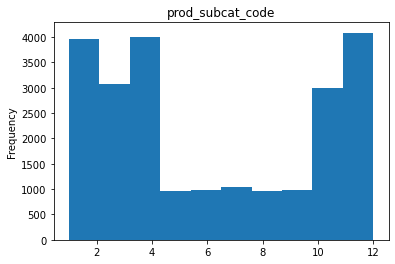

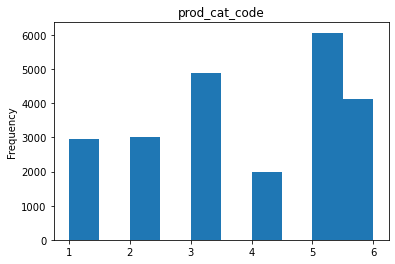

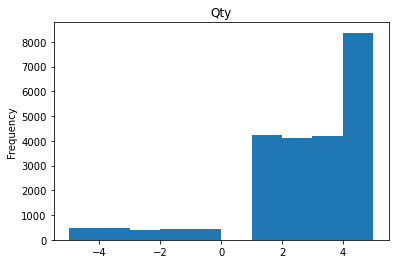

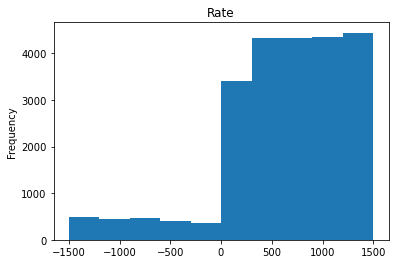

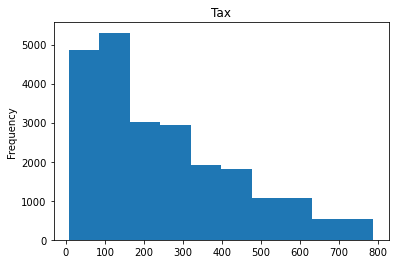

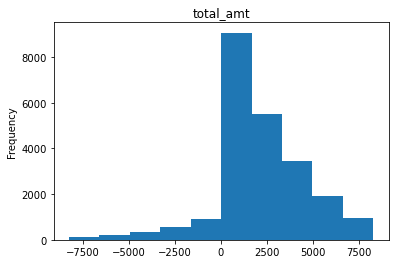

In [24]:
for var in conti_var.columns:
    conti_var[var].plot(kind='hist')
    plt.title(var)
    plt.show() 

## 4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

In [25]:
cust_final.sort_values(by='tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,1986-09-18,F,1.0,Home and kitchen,Kitchen
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,1990-05-25,M,5.0,Home and kitchen,Furnishing
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,1975-12-03,F,9.0,Electronics,Computers
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,1989-09-23,M,4.0,Electronics,Cameras
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,1973-04-08,F,1.0,Footwear,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,1979-04-25,M,3.0,Books,Children
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,1975-05-20,F,9.0,Electronics,Audio and video
146,17146707816,274897,2014-12-02,12,5,3,622,195.930,2061.930,MBR,1987-09-16,M,2.0,Books,Academic
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,1987-11-08,M,4.0,Electronics,Personal Appliances


In [45]:
cust_final.tran_date.max()-cust_final.tran_date.min()

Timedelta('1430 days 00:00:00')

### b. Count of transactions where the total amount of transaction was negative

In [26]:
neg_tran = cust_final.loc[cust_final["total_amt"] < 0,"transaction_id"].count()
neg_tran

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [27]:
prod_gender = cust_final.groupby(["Gender","prod_cat"])[["Qty"]].sum()
prod_gender.sort_values(by=['Gender','Qty'],ascending=False)

Qty
Gender prod_cat              
M      Books             7587
       Electronics       6476
       Home and kitchen  5041
       Clothing          3748
       Footwear          3555
       Bags              2346
F      Books             7070
       Electronics       5832
       Home and kitchen  4895
       Footwear          3716
       Clothing          3425
       Bags              2362

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [28]:
max_cust=cust_final.groupby('city_code')['cust_id'].count().sort_values(ascending=False)
max_cust

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: cust_id, dtype: int64

### 7. Which store type sells the maximum products by value and by quantity?

In [29]:
cust_final.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,1981-09-26,M,5.0,Clothing,Women


In [30]:
max_sales=cust_final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False)
max_sales

C:\Users\Akash\AppData\Local\Temp\ipykernel_8644\2761626573.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_sales=cust_final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False)


,Qty,Rate
Store_type,,
e-Shop,22763,5941001
MBR,11194,2953253
Flagship store,11133,2941557
TeleShop,10984,2834420


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [31]:
store_group = round(cust_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)

In [32]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [33]:
gender_group = round(cust_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)

In [35]:
male_earning = gender_group.loc["Electronics","M"]
print(male_earning)

5703109.42


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [39]:
trans = cust_final.loc[cust_final["total_amt"]>0,:]
trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,1986-10-13,M,1.0,Home and kitchen,Tools
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,1971-03-09,M,6.0,Books,DIY
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,1970-06-26,F,10.0,Books,Comics
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,1979-06-27,M,9.0,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children


In [42]:
unique_trans = trans.groupby(['cust_id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [43]:
unique_trans_count = unique_trans.groupby('cust_id')['transaction_id'].count().reset_index()

In [44]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,cust_id,transaction_id


### 11. For all customers aged between 25 - 35, find out:

### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [51]:
now = pd.Timestamp('now')
cust_final['DOB'] = pd.to_datetime(cust_final['DOB'], format='%m%d%y')    # 1
cust_final['DOB'] = cust_final['DOB'].where(cust_final['DOB'] < now, cust_final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
cust_final['AGE'] = (now - cust_final['DOB']).astype('<m8[Y]')

In [54]:
cust_final['Age_cat'] = pd.cut(cust_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [55]:
cust_25_35 = cust_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [57]:
cust_25_35

Age_cat  prod_cat        
25-35    Bags                1072906.380
         Books               3280119.570
         Clothing            1895220.860
         Electronics         2960480.640
         Footwear            1776831.160
         Home and kitchen    2371999.630
36-46    Bags                1961724.180
         Books               6267640.665
         Clothing            2893452.445
         Electronics         4983534.530
         Footwear            2913755.715
         Home and kitchen    4028522.810
47-57    Bags                1090078.080
         Books               3274933.805
         Clothing            1462464.185
         Electronics         2778448.465
         Footwear            1529187.400
         Home and kitchen    2038470.850
Name: total_amt, dtype: float64

In [59]:
cust_25_35.loc['25-35',['Books','Electronics']].sum()

6240600.21

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [61]:
cust_total_amt = cust_final[cust_final['Age_cat']=='25-35']

In [62]:
cust_total_amt

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY,30.0,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY,30.0,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,1989-08-17,M,10.0,Footwear,Mens,33.0,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,1992-01-02,F,6.0,Bags,Women,30.0,25-35
29,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,1987-08-06,F,7.0,Footwear,Women,35.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,1989-04-14,F,6.0,Clothing,Kids,33.0,25-35
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,1989-09-23,M,4.0,Electronics,Cameras,33.0,25-35
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,1992-11-24,M,9.0,Clothing,Kids,29.0,25-35
23038,61812307223,274306,2011-01-25,4,4,4,1447,607.740,6395.740,e-Shop,1989-01-12,M,2.0,Bags,Women,33.0,25-35


In [63]:
total_amt = cust_total_amt[(cust_total_amt['tran_date'] >='2014-01-01') &(cust_total_amt['tran_date'] <= '2014-03-01')]

In [64]:
total_amt['total_amt'].sum()

438478.365